

# Measuring subsets of qubits


In this notebook, we explore the possibility to measure a subset of qubits of a given output state.

## First example (Bell state)


Let us consider the Bell state $$|\psi\rangle=\frac{|00\rangle+|11\rangle}{\sqrt{2}}$$

Its vector of amplitudes is $(1/\sqrt{2},0,0,1/\sqrt{2})$.

Let us measure its first qubit. Then we should obtain 

- the value 0 with probability p=1/2, in which case the system is in state $|00\rangle$

- the value 1 with probability p=1/2, in which case the system is in state $|11\rangle$

The same holds for the second qubit since the state is invariant under a swap of its qubits.

In the cell below, we create a circuit whose output is this Bell state, and output the nonzero amplitudes: 

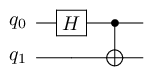

In [1]:
from qat.lang.AQASM import Program, H, CNOT, X
qprog = Program()
nbqbits = 2
qbits = qprog.qalloc(nbqbits)
qprog.apply(H, qbits[0]) 
qprog.apply(CNOT, qbits[0], qbits[1])

circuit = qprog.to_circ()
%qatdisplay circuit

In [2]:
from qat.qpus import PyLinalg
job1 = circuit.to_job()
result = PyLinalg().submit(job1)
for sample in result:
    print(f"State {sample.state}, amplitude {sample.amplitude}, probability {sample.probability}")


State |00>, amplitude (0.7071067811865475+0j), probability 0.4999999999999999
State |11>, amplitude (0.7071067811865475+0j), probability 0.4999999999999999


We now call the ``to_job`` method of the task with two arguments: 

- the first (``qubits``) specifies the indices of the qubits we want to measure, 
- the second (``nbshots``) the number of repetitions of the measurement.

In [3]:
# measuring qubit #0 50 times
job2 = circuit.to_job(qubits=[0], nbshots=50)
result = PyLinalg().submit(job2)
# Note how amplitudes are none here. Why?
for res in result:
    print(f"Qubit 0 has value {int(res.state[0])} (the probability of getting this result is {res.probability} +/- {res.err})")
print()

# measuring qubit #1 50 times
job3 = circuit.to_job(qubits=[1], nbshots=50)
result = PyLinalg().submit(job3)
for res in result:
    print(f"Qubit 1 has value {int(res.state[0])} (the probability of getting this result is {res.probability} +/- {res.err})")



Qubit 0 has value 0 (the probability of getting this result is 0.48 +/- 0.07137140569598169)
Qubit 0 has value 1 (the probability of getting this result is 0.52 +/- 0.07137140569598169)

Qubit 1 has value 1 (the probability of getting this result is 0.58 +/- 0.07050835816716038)
Qubit 1 has value 0 (the probability of getting this result is 0.42 +/- 0.07050835816716038)


## Example 2: measuring several qubits


In this last section, we are interested in a quantum state of the form $$|\psi\rangle=\frac{|000\rangle}{\sqrt{2}}+\frac{|100\rangle+|111\rangle}{2}$$

Its amplitudes are $(1/\sqrt{2},0,0,0, 1/2, 0, 0, 1/2)$.

Let us measure its first and second qubit. Then we should obtain 

- the value 0,0 with probability $p=0.5$
- the value 0,1 with probability $p=0$
- the value 1,0 with probability $p=0.25$
- the value 1,1 with probability $p=0.25$

Let us measure its second and third qubit. Then we should obtain 

- the value 0,0 with probability $p=0.75$
- the value 0,1 with probability $p=0$
- the value 1,0 with probability $p=0$
- the value 1,1 with probability $p=0.25$

Let us first build the circuit that prepares this state, and check the amplitudes are correct:

State |000>, amplitude (0.7071067811865475+0j), probability 0.4999999999999999
State |100>, amplitude (0.4999999999999999+0j), probability 0.2499999999999999
State |111>, amplitude (0.4999999999999999+0j), probability 0.2499999999999999


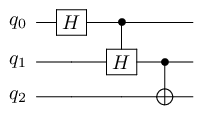

In [18]:
from qat.lang.AQASM import Program, H, CNOT

qprog = Program()
nbqbits = 3
qbits = qprog.qalloc(nbqbits)

qprog.apply(H, qbits[0])
qprog.apply(H.ctrl(), qbits[0], qbits[1])
qprog.apply(CNOT, qbits[1], qbits[2])
circuit = qprog.to_circ(submatrices_only=False)

result = PyLinalg().submit(circuit.to_job())

for sample in result:
    print(f"State {sample.state}, amplitude {sample.amplitude}, probability {sample.probability}")

%qatdisplay circuit

Let us now perform measurements on q0, q1 on the one hand, and q1, q2 on the other hand:

In [24]:
# measuring qubit #0 and #1 200 times
result = PyLinalg().submit(circuit.to_job(qubits=[0, 1], nbshots=200))
for res in result:
    print(f"Qubits 0,1 have value {int(res.state[0])},{int(res.state[1])} (the probability of getting this result is {res.probability} +/- {res.err})")
print()

# measuring qubit #1 and #2 200 times
result = PyLinalg().submit(circuit.to_job(qubits=[1, 2], nbshots=200))
for res in result:
    print(f"Qubits 0,1 have value {int(res.state[0])},{int(res.state[1])} (the probability of getting this result is {res.probability} +/- {res.err})")


Qubits 0,1 have value 0,0 (the probability of getting this result is 0.505 +/- 0.03544228800309698)
Qubits 0,1 have value 1,1 (the probability of getting this result is 0.275 +/- 0.03165255790786193)
Qubits 0,1 have value 1,0 (the probability of getting this result is 0.22 +/- 0.029365141882663273)

Qubits 0,1 have value 0,0 (the probability of getting this result is 0.77 +/- 0.029832025555495197)
Qubits 0,1 have value 1,1 (the probability of getting this result is 0.23 +/- 0.0298320255554952)
